<a href="https://colab.research.google.com/github/SrikarNagavelli/CODINGSAMURAI/blob/main/Project_EDA_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **📘 Titanic Dataset - Exploratory Data Analysis (EDA)**

## Data loading

### Subtask:
Load the Titanic dataset.


In [1]:
import pandas as pd

try:
    titanic_df = pd.read_csv('titanic.csv')
    display(titanic_df.head())
except FileNotFoundError:
    print("Error: 'titanic.csv' not found.")
    titanic_df = None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data exploration

### Subtask:
Explore the Titanic dataset.


**Reasoning**:
Examine the shape, data types, summary statistics, missing values, and unique values of categorical features in the Titanic dataset.



In [2]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", titanic_df.shape)

# Determine the data types of each column
print("\nData Types of each column:\n", titanic_df.dtypes)

# Generate summary statistics for numerical features
print("\nSummary Statistics for numerical features:\n", titanic_df.describe())

# Identify missing values
print("\nMissing Values:")
missing_values = titanic_df.isnull().sum()
missing_percentage = (missing_values / len(titanic_df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_info)

# For categorical features, determine unique values and frequencies
categorical_cols = titanic_df.select_dtypes(include=['object']).columns
print("\nCategorical Features:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(titanic_df[col].value_counts())

Shape of the DataFrame: (418, 12)

Data Types of each column:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Summary Statistics for numerical features:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000

## Data cleaning

### Subtask:
Clean the Titanic dataset by handling missing values.


**Reasoning**:
Impute missing 'Age' values based on passenger class, handle missing 'Cabin' values by creating a new feature, impute the missing 'Fare' value, and verify that there are no more missing values.



In [3]:
# Impute missing 'Age' values based on passenger class
titanic_df['Age'] = titanic_df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

# Handle missing 'Cabin' values
titanic_df['Cabin_Assigned'] = titanic_df['Cabin'].notna().astype(int)
titanic_df = titanic_df.drop('Cabin', axis=1)

# Impute missing 'Fare' value
titanic_df['Fare'] = titanic_df.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))

# Verify if there are any more missing values
print(titanic_df.isnull().sum())

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Embarked          0
Cabin_Assigned    0
dtype: int64


## Data analysis

### Subtask:
Analyze the cleaned Titanic dataset.


**Reasoning**:
Calculate descriptive statistics for numerical features, analyze the distribution of categorical features, and investigate the relationship between survival and other features.



In [4]:
# Calculate descriptive statistics for numerical features
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
print("Descriptive Statistics for Numerical Features:")
print(titanic_df[numerical_features].describe())

# Analyze the distribution of categorical features
categorical_features = ['Sex', 'Embarked', 'Pclass', 'Cabin_Assigned']
print("\nDistribution of Categorical Features:")
for feature in categorical_features:
    print(f"\n{feature}:")
    print(titanic_df[feature].value_counts(normalize=True))

# Investigate the relationship between survival and other features
print("\nSurvival Rate by Feature:")
for feature in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin_Assigned']:
    print(f"\n{feature}:")
    print(titanic_df.groupby(feature)['Survived'].mean())

# Analyze the relationship between survival and age groups
print("\nSurvival Rate by Age Groups:")
age_groups = pd.cut(titanic_df['Age'], bins=[0, 18, 30, 50, 100], labels=['0-18', '19-30', '31-50', '51+'])
print(titanic_df.groupby(age_groups)['Survived'].mean())

# Analyze the relationship between survival and fare groups
print("\nSurvival Rate by Fare Groups:")
fare_groups = pd.qcut(titanic_df['Fare'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
print(titanic_df.groupby(fare_groups)['Survived'].mean())

Descriptive Statistics for Numerical Features:
              Age       SibSp       Parch        Fare
count  418.000000  418.000000  418.000000  418.000000
mean    29.399522    0.447368    0.392344   35.560845
std     12.992298    0.896760    0.981429   55.856972
min      0.170000    0.000000    0.000000    0.000000
25%     23.000000    0.000000    0.000000    7.895800
50%     25.000000    0.000000    0.000000   14.454200
75%     36.375000    1.000000    0.000000   31.471875
max     76.000000    8.000000    9.000000  512.329200

Distribution of Categorical Features:

Sex:
Sex
male      0.636364
female    0.363636
Name: proportion, dtype: float64

Embarked:
Embarked
S    0.645933
C    0.244019
Q    0.110048
Name: proportion, dtype: float64

Pclass:
Pclass
3    0.521531
1    0.255981
2    0.222488
Name: proportion, dtype: float64

Cabin_Assigned:
Cabin_Assigned
0    0.782297
1    0.217703
Name: proportion, dtype: float64

Survival Rate by Feature:

Pclass:
Pclass
1    0.467290
2    0.3225

<ipython-input-4-1196343317>:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(titanic_df.groupby(age_groups)['Survived'].mean())
<ipython-input-4-1196343317>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(titanic_df.groupby(fare_groups)['Survived'].mean())


## Data visualization

### Subtask:
Visualize the data distributions and relationships.


**Reasoning**:
Visualize the data distributions and relationships using histograms, bar plots, a correlation heatmap, and box plots as specified in the instructions.



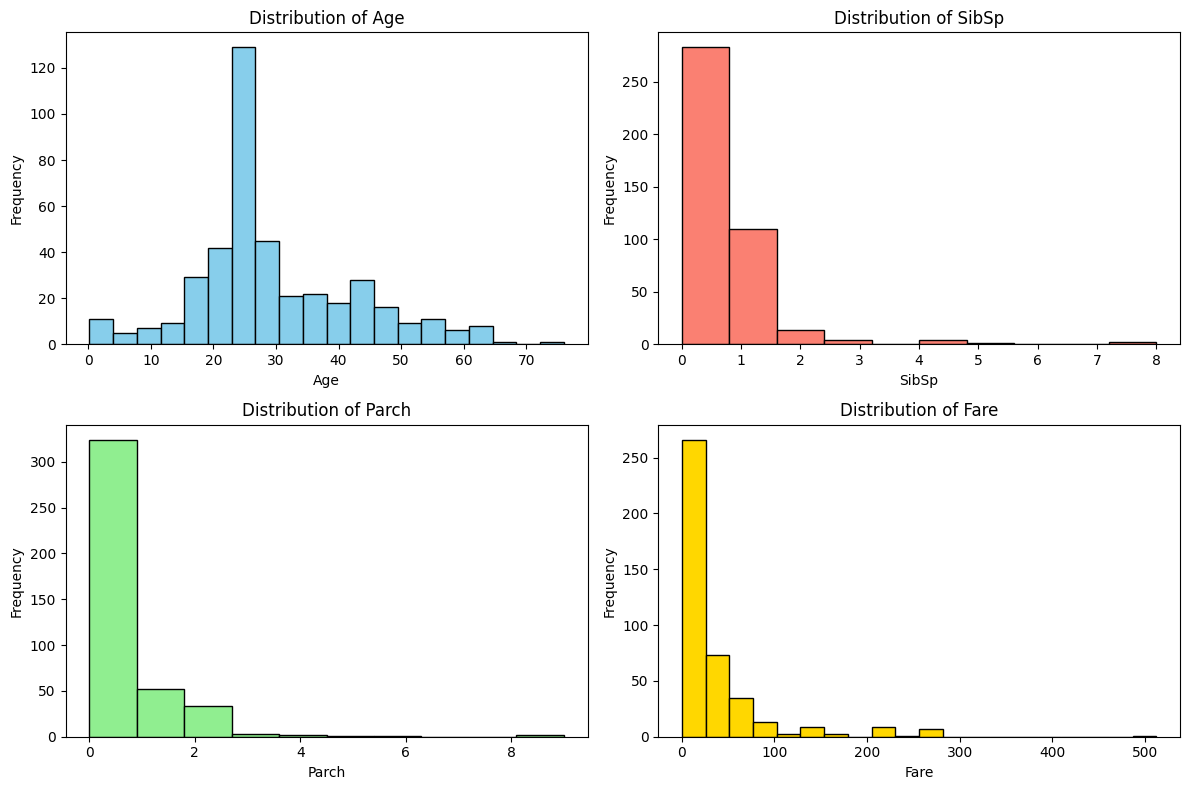

<ipython-input-5-1272515861>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=titanic_df, palette='viridis')
<ipython-input-5-1272515861>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=titanic_df, palette='magma')
<ipython-input-5-1272515861>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=titanic_df, palette='cividis')
<ipython-input-5-1272515861>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable t

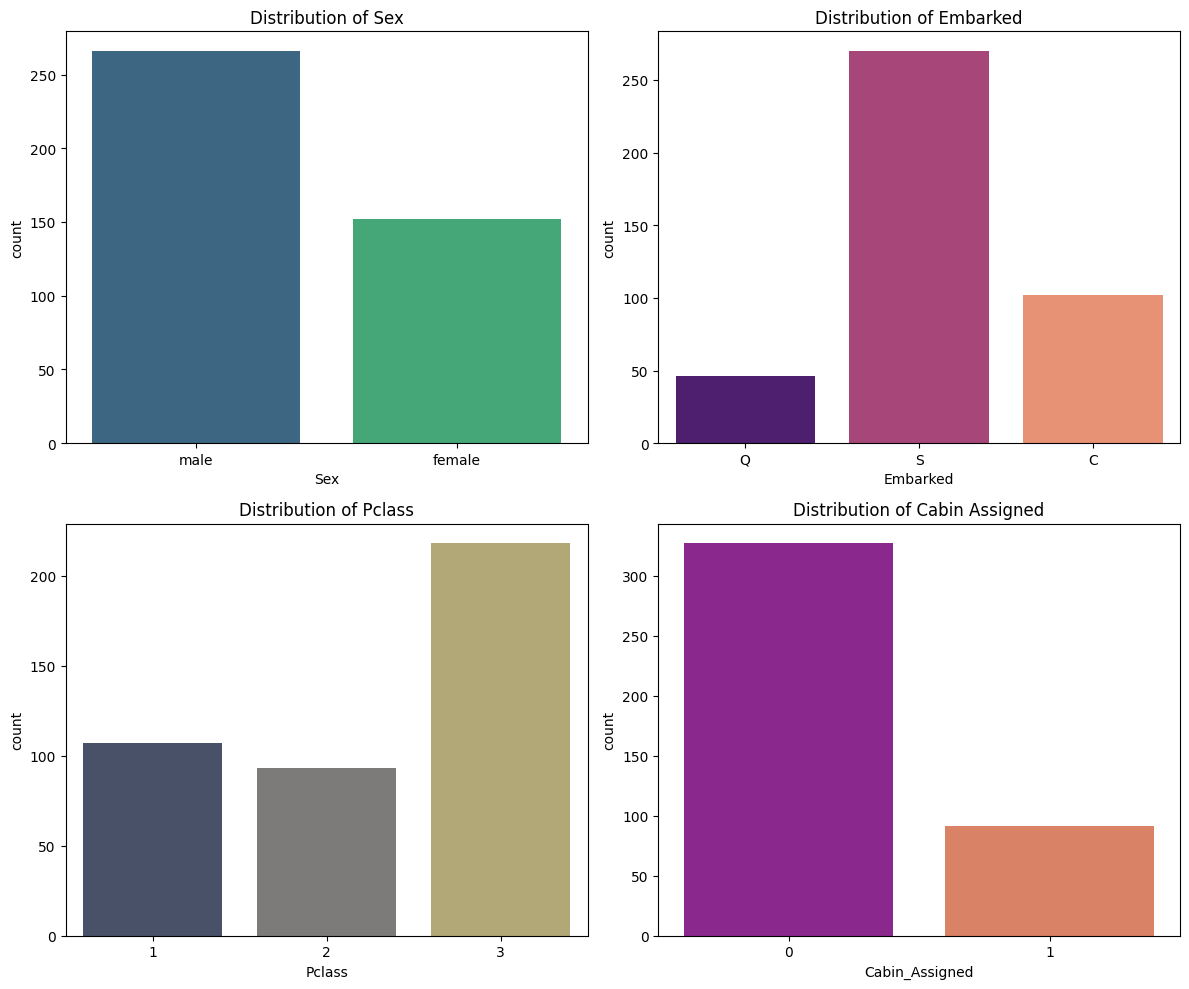

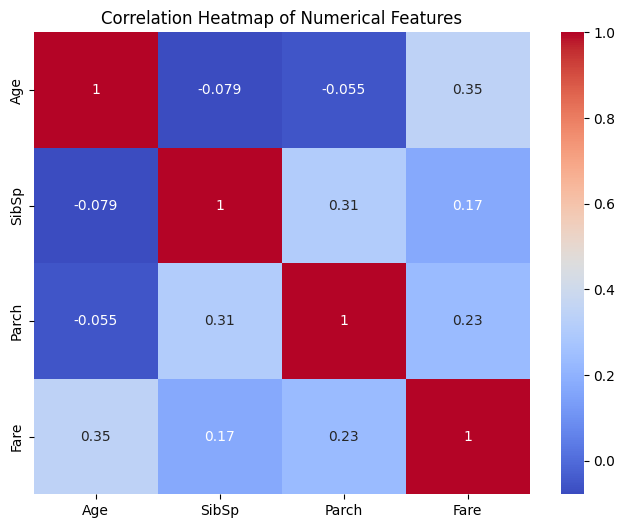

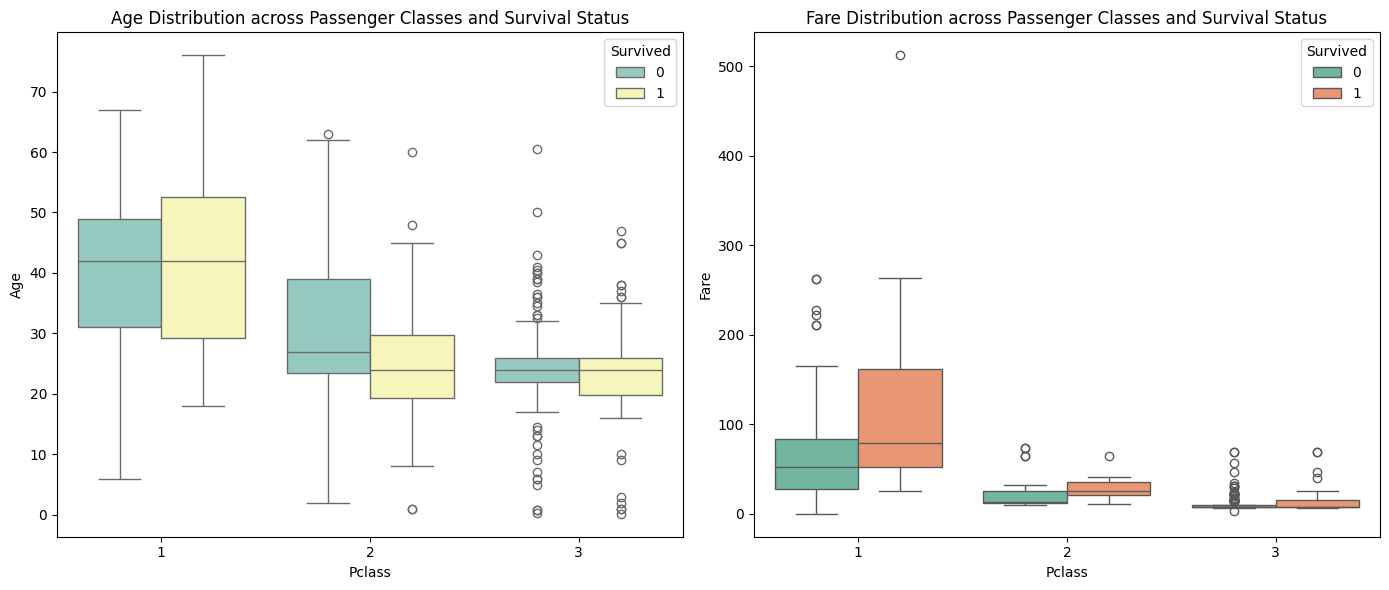

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(titanic_df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

plt.subplot(2, 2, 2)
plt.hist(titanic_df['SibSp'], bins=10, color='salmon', edgecolor='black')
plt.xlabel('SibSp')
plt.ylabel('Frequency')
plt.title('Distribution of SibSp')

plt.subplot(2, 2, 3)
plt.hist(titanic_df['Parch'], bins=10, color='lightgreen', edgecolor='black')
plt.xlabel('Parch')
plt.ylabel('Frequency')
plt.title('Distribution of Parch')

plt.subplot(2, 2, 4)
plt.hist(titanic_df['Fare'], bins=20, color='gold', edgecolor='black')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fare')
plt.tight_layout()
plt.show()


# Bar plots for categorical features
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='Sex', data=titanic_df, palette='viridis')
plt.title('Distribution of Sex')

plt.subplot(2, 2, 2)
sns.countplot(x='Embarked', data=titanic_df, palette='magma')
plt.title('Distribution of Embarked')

plt.subplot(2, 2, 3)
sns.countplot(x='Pclass', data=titanic_df, palette='cividis')
plt.title('Distribution of Pclass')

plt.subplot(2, 2, 4)
sns.countplot(x='Cabin_Assigned', data=titanic_df, palette='plasma')
plt.title('Distribution of Cabin Assigned')

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(titanic_df[['Age', 'SibSp', 'Parch', 'Fare']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Box plots
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=titanic_df, palette='Set3')
plt.title('Age Distribution across Passenger Classes and Survival Status')

plt.subplot(1, 2, 2)
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=titanic_df, palette='Set2')
plt.title('Fare Distribution across Passenger Classes and Survival Status')

plt.tight_layout()
plt.show()